# Análise exploratória dos dados da Malária em 2022 utilizando o PySUS

### Introdução:
O SINAN é uma base de dados de casos de certas doenças que a lei brasileira exige que sejam reportados. Para esta análise foram escolhidos como objeto de estudo os casos de malária e o código da doença dentro do SINAN é B54.

## Metodologia
Foi possível extrair os dados do SINAN utilizando python através da bilbioteca "PySUS", criada por Flávio Codeço Coelho. O PySUS é uma biblioteca com uma coleção de códigos que buscam auxiliar pessoas com a análise de dados do SUS (Sistema Único de Saúde).
Com os dados em mãos, foram utilizadas as bibliotecas "Pandas" e "pyPlot", que, respectivamente, auxiliam na manipulação do *dataframe* e na visualização dos dados.

### Abaixo seguem os códigos que buscam responder as seguintes perguntas:

Quantos casos de malária foram notificados no Brasil em 2022 por:

1.   Município?
2.   Estado?
3.   Mês?
4.   Faixa Etária?
5.   Sexo?
6.   Raça/cor?










Aluno: Gustavo Bianchi da Silva
1° Período Ciência de Dados e I.A



Instalando PySUS

In [ ]:
!pip install pysus

Importando os módulos necessários do pysus e a biblioteca "pandas" e "matplotlib" para a análise exploratória dos dados.

In [ ]:
from pysus.online_data import SINAN, FTP_Inspect, parquets_to_dataframe
import pandas as pd
import matplotlib.pyplot as plt
import math
SINAN.list_diseases()

Após escolher a malária como objeto de estudo, verifica-se os anos de dados disponíveis.

In [ ]:
anos = SINAN.get_available_years('Malaria')
anos

Verificando se os dados são preliminares ou finais.

In [ ]:
lu = FTP_Inspect('SINAN').last_update_df()
lu[lu.file_name.str.startswith('MALA')]

Escolhendo os dados finais mais recentes = 2022

In [ ]:
path = SINAN.download('Malaria', int(anos[len(anos)-1]))
df = pd.read_parquet(path)

Verificando a aparênia do DataFrame

In [ ]:
df.to_csv('Malaria.csv', index=False)
df.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,DT_ENCERRA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H
0,2,B54,20220101,202152,2022,29,291465,1388,4026926,20211231,...,,20220121,,,,,,,,
1,2,B54,20220101,202152,2022,29,291465,1388,4026926,20211228,...,,20220126,,,,,,,,
2,2,B54,20220101,202152,2022,42,420300,1546,2301938,20211225,...,,20220103,,,20220104,,,,,
3,2,B54,20220101,202152,2022,52,520870,1779,2506661,20211109,...,,20220103,,,,,,,,
4,2,B54,20220101,202152,2022,52,520870,1779,2506661,20210604,...,,20220103,,,,,,,,


Decodificando a idade:

In [ ]:
from pysus.preprocessing.decoders import decodifica_idade_SINAN

In [ ]:
df['idade'] = decodifica_idade_SINAN(df.NU_IDADE_N)

Número de casos de Malária por semana em 2022

<Axes: xlabel='DT_DIGITA'>

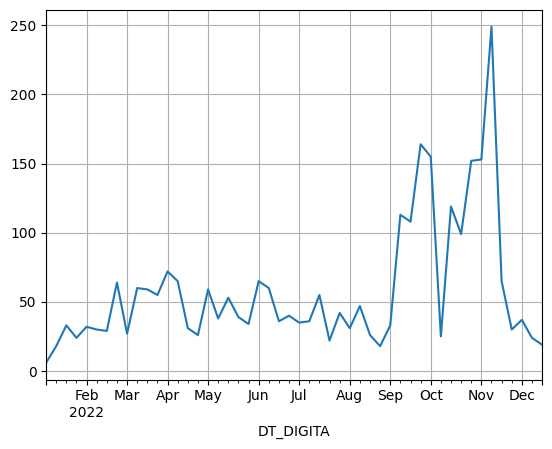

In [ ]:
df.DT_DIGITA = pd.to_datetime(df.DT_DIGITA)
df1 = df.set_index('DT_DIGITA')
df1.ID_AGRAVO.resample('1W').count().plot(grid=True)

Número de casos de Malária por mês em 2022

<Axes: xlabel='DT_DIGITA'>

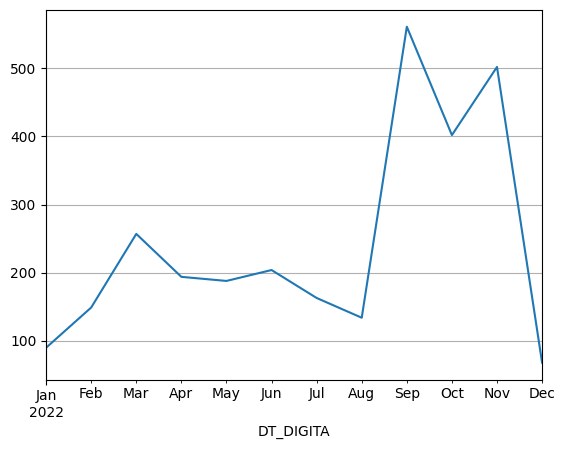

In [ ]:
df2 = df.set_index('DT_DIGITA')
df2.ID_AGRAVO.resample('1M').count().plot(grid=True)

Casos de malária por estado em 2022. Constam no gráfico apenas os ID's dos estados com um número significativo de casos.

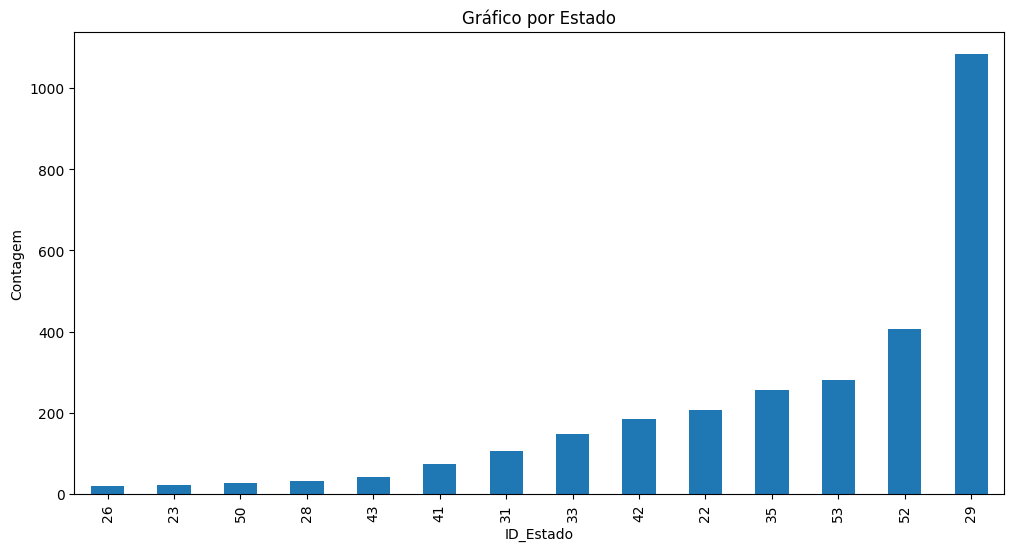

In [ ]:
df_estados = df.groupby('SG_UF_NOT').size()

df_estados = df_estados[df_estados >= 20]
df_estados = df_estados.sort_values()

plt.figure(figsize=(12, 6))

df_estados.plot(kind='bar')

plt.xlabel('ID_Estado')
plt.ylabel('Contagem')
plt.title('Gráfico por Estado')
plt.show()

Casos de malária por município em 2022. Constam no gráfico apenas os ID's dos municípios com um número significativo de casos.

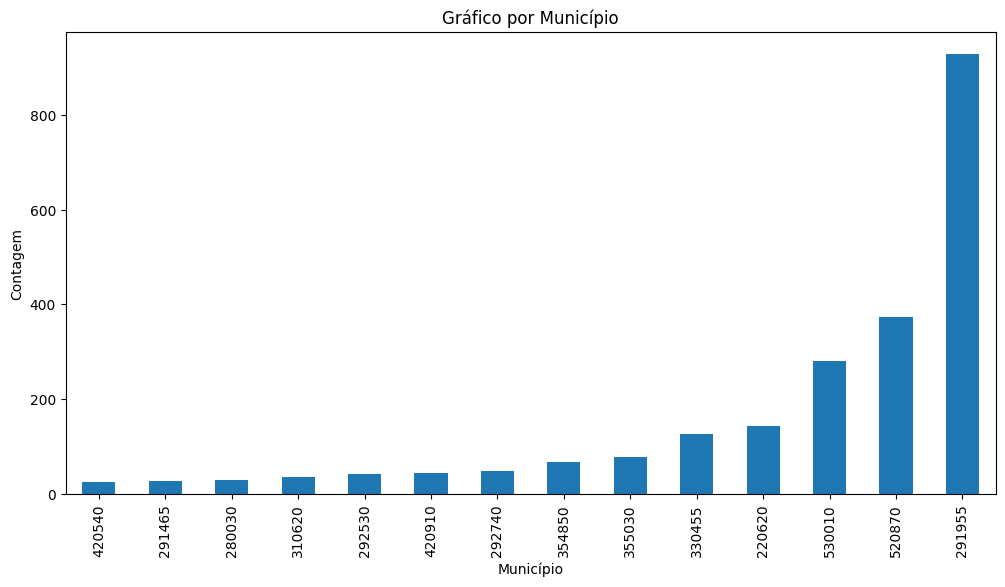

In [ ]:
df_municipio = df.groupby('ID_MUNICIP').size()

df_municipio = df_municipio[df_municipio >= 20]
df_municipio = df_municipio.sort_values()

plt.figure(figsize=(12, 6))

df_municipio.plot(kind='bar')

plt.xlabel('ID Município')
plt.ylabel('Contagem')
plt.title('Gráfico por Município')
plt.show()

Gráfico de casos de malária por faixa etária em 2022.

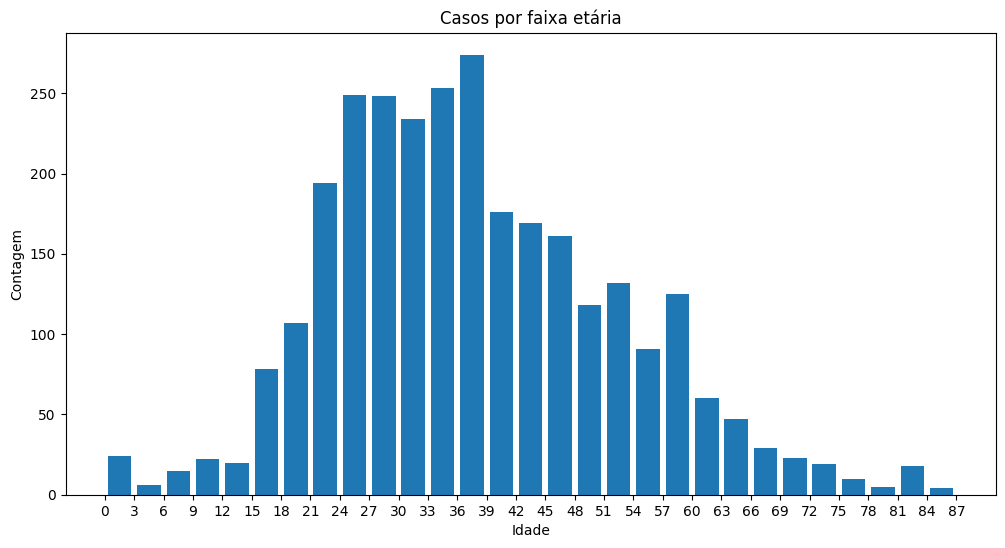

In [ ]:
df_idades = df.groupby('idade').size()

df_idades = df_idades[df_idades >= 1]

plt.figure(figsize=(12, 6))

plt.hist(df['idade'], bins=range(0, 90, 3), rwidth=0.8)

plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Casos por faixa etária')
plt.xticks(range(0, 90, 3))  
plt.show()

Gráfico de casos de malária por gênero em 2022.

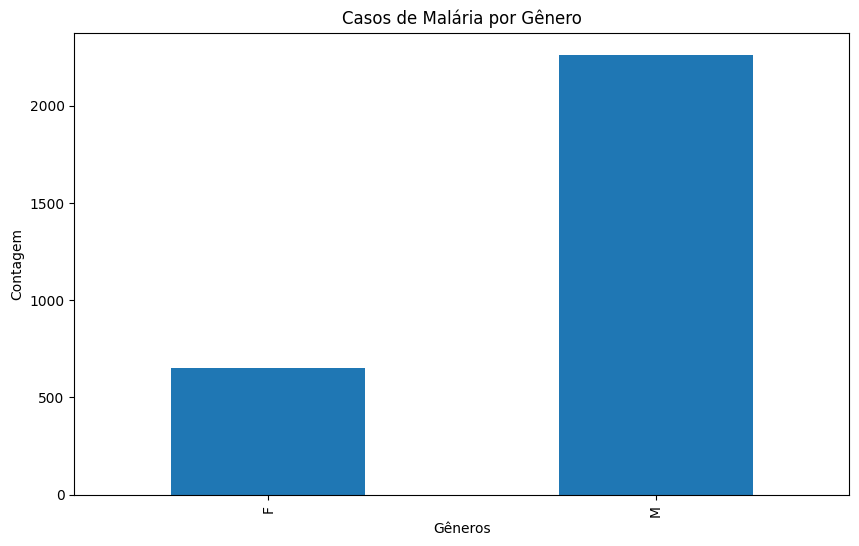

In [ ]:
df_sexo = df.groupby('CS_SEXO').size()

df_sexo = df_sexo[df_sexo >= 1]
df_sexo = df_sexo.sort_values()

plt.figure(figsize=(10, 6))

df_sexo.plot(kind='bar')

plt.xlabel('Gêneros')
plt.ylabel('Contagem')
plt.title('Casos de Malária por Gênero')
plt.show()

Raça

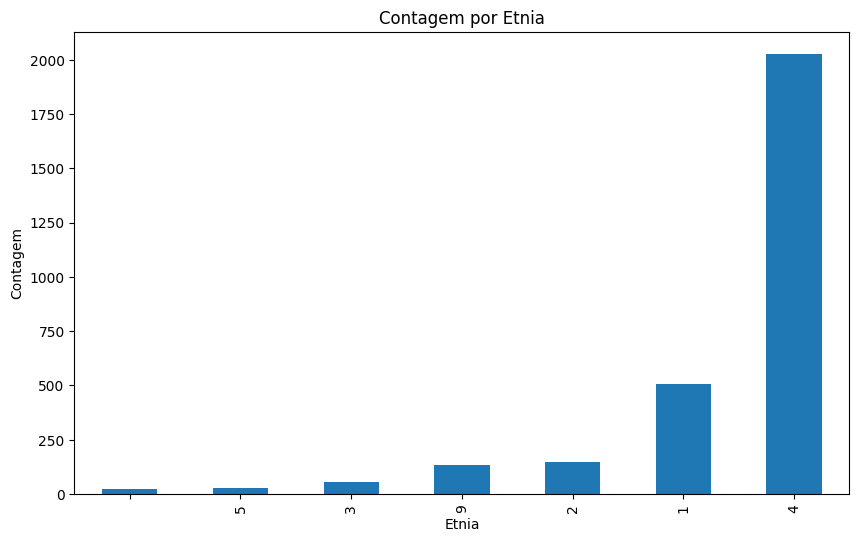

In [ ]:
df_raca = df.groupby('CS_RACA').size()

plt.figure(figsize=(10, 6))
df_raca = df_raca.sort_values()

df_raca.plot(kind='bar')

plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.title('Contagem por Etnia')
plt.show()
     